# Lab 4  -  stellar spectra

In this lab, we're going to look at model spectra to find the temperatures of our mystery stars. The lab will walk you through Star 1, but you can repeat this analysis on Star 2 & 3 if you have time leftover.

Make sure to read the instructions carefully, add comments to explain what your code is doing, and answer any written questions within the notebook.

Astronomy skills:
- absorption spectra
- spectral types
- chi-squared analysis

Python skills:
- making & customizing plots
- array math


## Set up

Download the zip file for this lab and unzip it. You cshould have the spectra for different spectral types and the observed spectra for 3 mystery stars. The files are .csv files with columns:

- Wavelength -- units of nm

- Normalized Flux -- the fluxes have been "continuum normalized", meaning that the overall blackbody shape has been divided out.

- Error -- the uncertainty in the normalized flux values (for mystery stars only)

(Reminder to upload all these files into Colab so you can use them!)

\

Run the cell below to read in the packages you'll need for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Star 1

## Step 1 - observed spectrum

Let's start with Star 1.

1. Read in the data for Star 1 ("Lab04_Star1.csv")
2. Make a plot of the spectrum, with axis labels!

Note, we normally do not plot [error bars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html#matplotlib.pyplot.errorbar) with spectra because they make the plot very hard to read. But you're welcome to make a separate plot to see what it looks like!



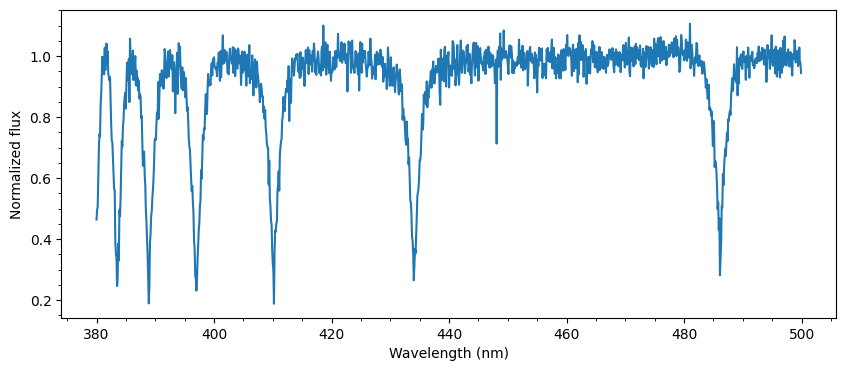

In [34]:
# code here

# read in data
w1, f1, e1 = np.loadtxt('Star1.csv', delimiter=',', skiprows=1, unpack=True)

# make plot
plt.figure(figsize=(10,4))
plt.plot(w1, f1)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized flux')
plt.minorticks_on()
plt.show()

**Question**: Choose 2-3 of the strongest absorption lines that you see in the spectrum and list their wavelengths below.

(Note, you can show the minor tick marks in your plot using `plt.minorticks_on()`. This will help!)

In [7]:
# answer here

# wavelengths = H beta 486.1 and H gamma 434.0

## Step 2 - model spectra

Now let's look at the model spectra for different spectral types: B, A, F, G, and K

1. Read in the spectrum for each spectral type. Note, each data set should have unique/informative names for convenience.
2. Make one plot with all 5 spectra on it.

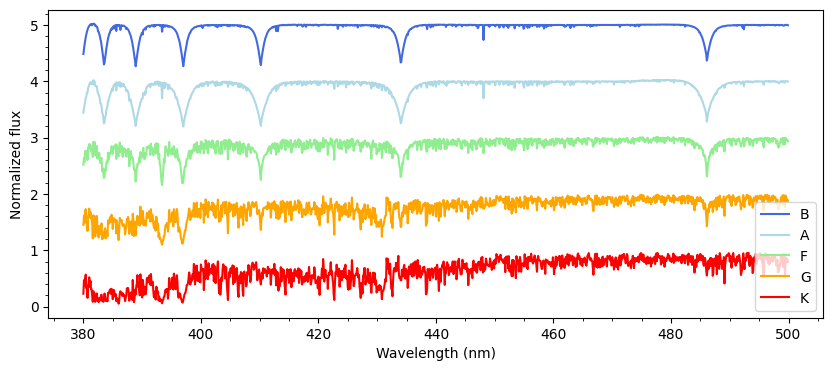

In [35]:
# code here

# read in model data
wB, fB = np.loadtxt('Bstar.csv', delimiter=',', skiprows=1, unpack=True)
wA, fA = np.loadtxt('Astar.csv', delimiter=',', skiprows=1, unpack=True)
wF, fF = np.loadtxt('Fstar.csv', delimiter=',', skiprows=1, unpack=True)
wG, fG = np.loadtxt('Gstar.csv', delimiter=',', skiprows=1, unpack=True)
wK, fK = np.loadtxt('Kstar.csv', delimiter=',', skiprows=1, unpack=True)

# make plot
plt.figure(figsize=(10,4))
plt.plot(wB, fB+4, color='royalblue', label='B')
plt.plot(wA, fA+3, color='lightblue', label='A')
plt.plot(wF, fF+2, color='lightgreen', label='F')
plt.plot(wG, fG+1, color='orange', label='G')
plt.plot(wK, fK,   color='red', label='K')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized flux')
plt.minorticks_on()
plt.legend()
plt.show()

At first, the spectra might overlap with each other and look horrible!
3. Modify your plot so you can easily see all of the spectra at the same time. (How could you do this?)



Now let's make it prettier...
4. Change the plot color of each spectral type to better match what color it would appear to our eyes. (Though you should avoid white! Pick a light color instead.) [Here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors) is a list of color names, and an example:
```
plt.plot(x, y, color="darkviolet")
```

**Question**:
How does the strength of the H$\beta$ 486.1 nm line vary as a function of temperature? Explain how the appearance changes from the hottest spectral type to the coolest.

In [ ]:
# answer here

#  increases from B to A, then decreases to K

## Step 3 - $\chi^2$ analysis

We could compare Star 1's spectrum to the models by eye and guess which spectral type it is. But the more accurate way would be to mathematically compare how well each model spectrum matches the spectrum of Star 1, using the chi-squared ($\chi^2$) "goodness-of-fit statistic":
$$\chi^2 = \sum \frac{(y_{data} - y_{model})^2}{\sigma_y~^2}$$

where $y_{data}$ is the observed data array, $\sigma_y$ is its error, and $y_{model}$ is the model data.

This statistic calculates how *different* two data sets are, so the best fitting model is going to have the *lowest* $\chi^2$ value.

Calculate the $\chi^2$ value for Star 1 compared to the  model of the B-type star.

In [36]:
# calculate chi2 of B star model
chi2 = np.sum((f1 - fB)**2 / e1**2)
print('B star', chi2)

B star 5256.747919309768


As a self check, you should get a value of 5256.
- If you didn't get this value, talk to your neighbor to see what could be going wrong!
- Once you do, then calculate the $\chi^2$ of the other models/spectral types. (Make sure to add comments!)



In [37]:
# code here

# calculate chi2 of B star model
chi2 = np.sum((f1 - fB)**2 / e1**2)
print('B star', chi2)

# calculate chi2 of A star model
chi2 = np.sum((f1 - fA)**2 / e1**2)
print('A star', chi2)

# calculate chi2 of F star model
chi2 = np.sum((f1 - fF)**2 / e1**2)
print('F star', chi2)

# calculate chi2 of G star model
chi2 = np.sum((f1 - fG)**2 / e1**2)
print('G star', chi2)

# calculate chi2 of K star model
chi2 = np.sum((f1 - fK)**2 / e1**2)
print('K star', chi2)

B star 5256.747919309768
A star 710.6047111962869
F star 8725.418122458632
G star 37618.460780780675
K star 79839.21855935227


**Question**: What spectral type is Star 1?

In [ ]:
# answer here

#  The A star model has the lowest chi2 value so it must be the best fit.

## Step 4 - plot the best fit

Make a plot of Star 1's spectrum with the best fitting model plotted on top to see how well they match.

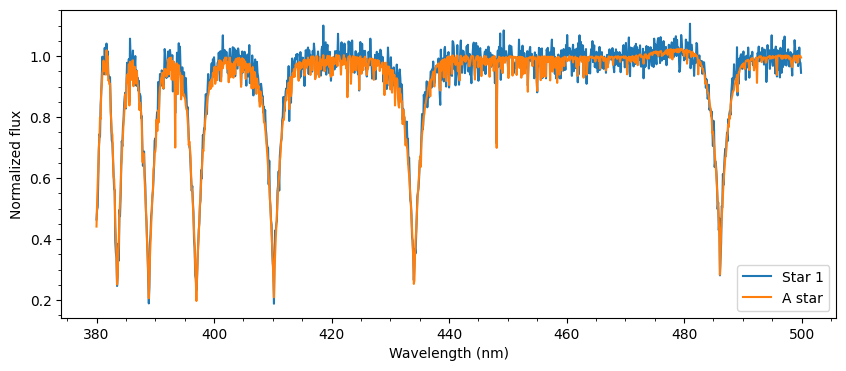

In [38]:
# code here
plt.figure(figsize=(10,4))
plt.plot(w1, f1, label='Star 1')
plt.plot(wA, fA, label='A star')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized flux')
plt.minorticks_on()
plt.legend()
plt.show()

## Questions
1. Using the values on [this website](https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html), roughly what effective temperature does Star 1 have?

2. How could you narrow down the spectral type to a certain subtype (0-9)? Explain what other data and/or analysis you would need.


In [5]:
# write your answers here

# 1.

# 2.


# Bonus [optional]

If you have time leftover:
- write a python function to calculate chi-squared, instead of doing the math by hand
- repeat this process for Star 2 and/or Star 3 to find their spectral types

STAR 2
B star 4781697.057868845
A star 3922156.2905765222
F star 1602405.3895682765
G star 334915.31202450226
K star 33791.979879990955


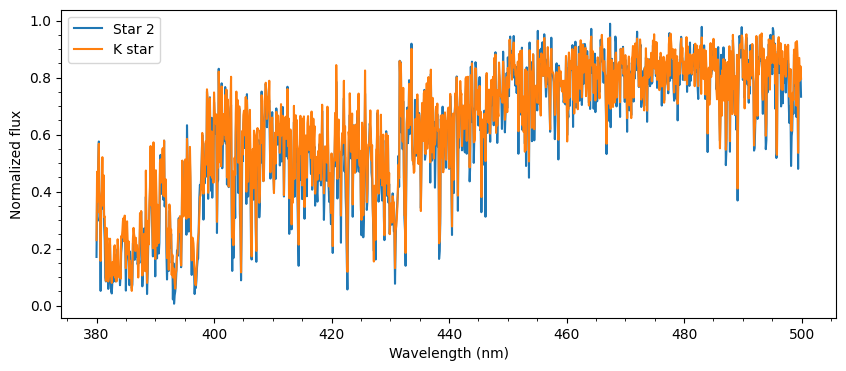

In [39]:
# optional code here

print('STAR 2')

# read in data
w2, f2, e2 = np.loadtxt('Star2.csv', delimiter=',', skiprows=1, unpack=True)

# calculate chi2 of B star model
chi2 = np.sum((f2 - fB)**2 / e2**2)
print('B star', chi2)

# calculate chi2 of A star model
chi2 = np.sum((f2 - fA)**2 / e2**2)
print('A star', chi2)

# calculate chi2 of F star model
chi2 = np.sum((f2 - fF)**2 / e2**2)
print('F star', chi2)

# calculate chi2 of G star model
chi2 = np.sum((f2 - fG)**2 / e2**2)
print('G star', chi2)

# calculate chi2 of K star model
chi2 = np.sum((f2 - fK)**2 / e2**2)
print('K star', chi2)

plt.figure(figsize=(10,4))
plt.plot(w2, f2, label='Star 2')
plt.plot(wK, fK, label='K star')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized flux')
plt.minorticks_on()
plt.legend()
plt.show()

STAR 2
B star 21514.01761674682
A star 12827.992069771746
F star 1095.4753975959873
G star 21618.948415643652
K star 64302.21569090094


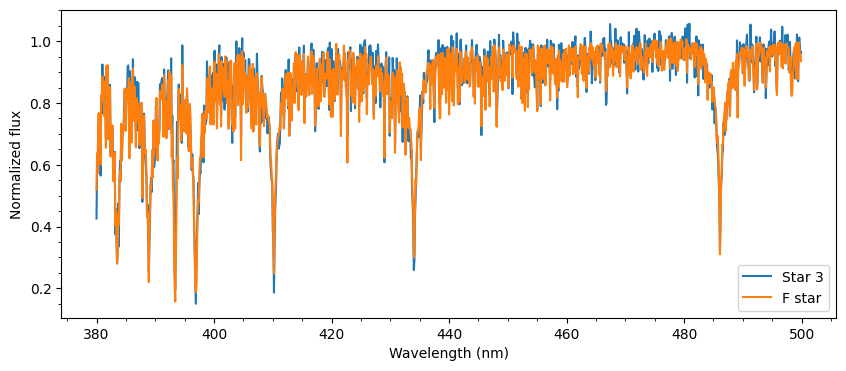

In [41]:
print('STAR 2')

# read in data
w3, f3, e3 = np.loadtxt('Star3.csv', delimiter=',', skiprows=1, unpack=True)

# calculate chi2 of B star model
chi2 = np.sum((f3 - fB)**2 / e3**2)
print('B star', chi2)

# calculate chi2 of A star model
chi2 = np.sum((f3 - fA)**2 / e3**2)
print('A star', chi2)

# calculate chi2 of F star model
chi2 = np.sum((f3 - fF)**2 / e3**2)
print('F star', chi2)

# calculate chi2 of G star model
chi2 = np.sum((f3 - fG)**2 / e3**2)
print('G star', chi2)

# calculate chi2 of K star model
chi2 = np.sum((f3 - fK)**2 / e3**2)
print('K star', chi2)

plt.figure(figsize=(10,4))
plt.plot(w3, f3, label='Star 3')
plt.plot(wF, fF, label='F star')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized flux')
plt.minorticks_on()
plt.legend()
plt.show()

---
## Final steps

**Turning in your lab**

If using Colab -- Click File --> Save a copy to Drive. Save the file to your shared Lab folder.


If using Jupyter --
Save this notebook to your computer, then upload it to your shared Lab folder in Google Drive.